# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

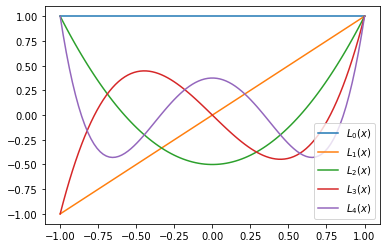

In [15]:
from matplotlib import pyplot as plt
import scipy.special as sps
import numpy as np

x = np.linspace(-1,1,100)
fig, ax = plt.subplots()

for i in range(5):
    ax.plot(x,sps.eval_legendre(i,x),label=f"$L_{i}(x)$")
    ax.legend(loc="lower right")
    
plt.show()

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
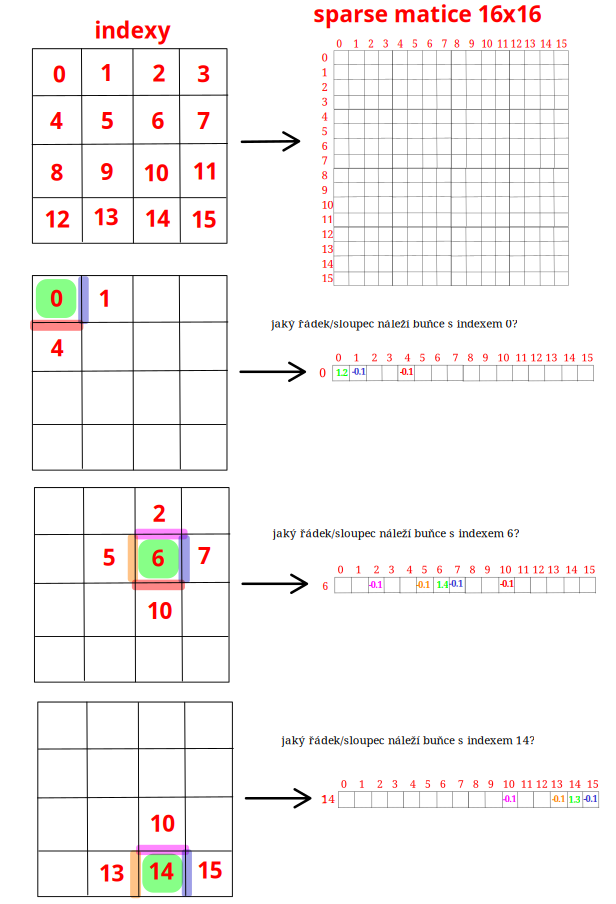


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [18]:
import scipy.sparse as sparse
n = 12
epsilon = 2e-1
A = sparse.lil_matrix((n*n, n*n))

for i in range(n):
    for j in range(n):
        # TODO fill matrix A - diagonal and non-diagonal elements
        if (i,j) in ((0,0),(0,n-1),(n-1,0),(n-1,n-1)):
            k = 2
        elif i == 0 or i == n-1 or j == 0 or j == n-1:
            k = 3
        else:
            k = 4
        A[i*n+j,i*n+j] = 1 + k*epsilon
        if i*n+j+1 < n*n:
            A[i*n+j,i*n+j+1] = -epsilon
            A[i*n+j+1,i*n+j] = -epsilon
        if (i+1)*n+j < n*n:
            A[(i+1)*n+j,i*n+j] = -epsilon
            A[i*n+j,(i+1)*n+j] = -epsilon

print(A.todense())

[[ 1.4 -0.2  0.  ...  0.   0.   0. ]
 [-0.2  1.6 -0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  1.6 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.6 -0.2  0. ]
 [ 0.   0.   0.  ... -0.2  1.6 -0.2]
 [ 0.   0.   0.  ...  0.  -0.2  1.4]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [ ]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = # TODO - vytvořte indexy buněk pod hranou
    row_horizontal = # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix(data,(row,col)) # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

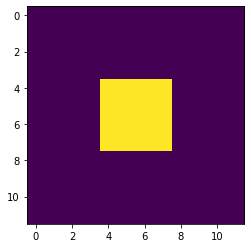

In [19]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
# A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

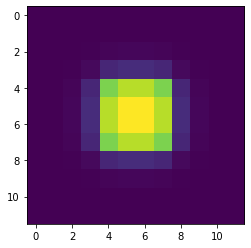

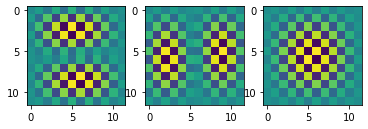

In [25]:
import scipy.sparse.linalg as spl

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
x = spl.spsolve(A, b)
plt.imshow(x.reshape((n,n)))

w,v = spl.eigsh(A,k=3)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(v[:,0].reshape((n,n)))
ax2.imshow(v[:,1].reshape((n,n)))
ax3.imshow(v[:,2].reshape((n,n)))

In [ ]:
# TODO - spočtěte a vykreslete vlastní vektory matice A

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [29]:
import scipy.optimize as opt

L5 = lambda x: sps.eval_legendre(5,x)
a, b = -1,1
resolution = 1000

x_vals = np.linspace(a, b, resolution)
sign_changes = []

for i in range(len(x_vals) - 1):
    if np.sign(L5(x_vals[i])) != np.sign(L5(x_vals[i + 1])):
        sign_changes.append((x_vals[i], x_vals[i + 1]))

roots = []
for interval in sign_changes:
    result = opt.root_scalar(L5, bracket=interval)
    roots.append(result.root)

roots = np.array(roots)

print(f"Kořeny jsou v bodech {roots} a mají hodnoty {L5(roots)}.")

Kořeny jsou v bodech [-9.06179846e-01 -5.38469310e-01  7.02563008e-17  5.38469310e-01
  9.06179846e-01] a mají hodnoty [ 3.55271368e-15 -3.33066907e-16  1.31730564e-16  5.55111512e-17
 -3.99680289e-15].


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [30]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5


63*x**5/8 - 35*x**3/4 + 15*x/8

In [34]:
koreny = sp.solve(legendre_5,x)
[k.evalf(10) for k in koreny]

[0, -0.5384693101, 0.5384693101, -0.9061798459, 0.9061798459]